# How do Neural Networks Actually Learn
The goal of this journey is to take you from "1+1=2" to "How a Neural Network Learns" .. where you think "that was easy" at each step..



# Supporting material

This journey takes ideas from these excellent sources:

- But what is a neural network: https://www.youtube.com/watch?v=aircAruvnKk
- Backpropagation Demystified: A Step-by-Step Guide to the Heart of Neural Networks: https://www.youtube.com/watch?v=QflXxNfMCKo
- Neural Networks Explained from Scratch using Python: https://www.youtube.com/watch?v=9RN2Wr8xvro
- Using neural nets to recognize handwritten digits: https://neuralnetworksanddeeplearning.com/chap1.html
- The fastai course: https://course.fast.ai/

# To follow this journey yourself:

- install Jupyter Labs: https://jupyter.org/install
- git clone https://github.com/kennylomax/aiwarmups.git
- cd aiwarmups
- pip install nbclassic
- jupyter nbclassic hackAIthonWarmup3_0.ipynb


# Prepare our environment:

In [ ]:
!pip install fastbook
from fastai.vision.all import *
from fastbook import *
from ipywidgets import *
import math
import matplotlib.pyplot as plt
import numpy as np

# BACKGROUND
## Setting the scene:

- Neural Networks may be unfamiliar but they are not complex or magic. They are actually rather simple
- We consider the basic Neural Network in this journey.
- Making and training a new Neural Network from scratch, to recognise hand-written digits takes about 20 lines of code
  - code: https://github.com/Bot-Academy/NeuralNetworkFromScratch/blob/master/nn.py
  - video explanation: https://www.youtube.com/watch?v=9RN2Wr8xvro
  - there are no special libraries (hiding complexity) here<br>

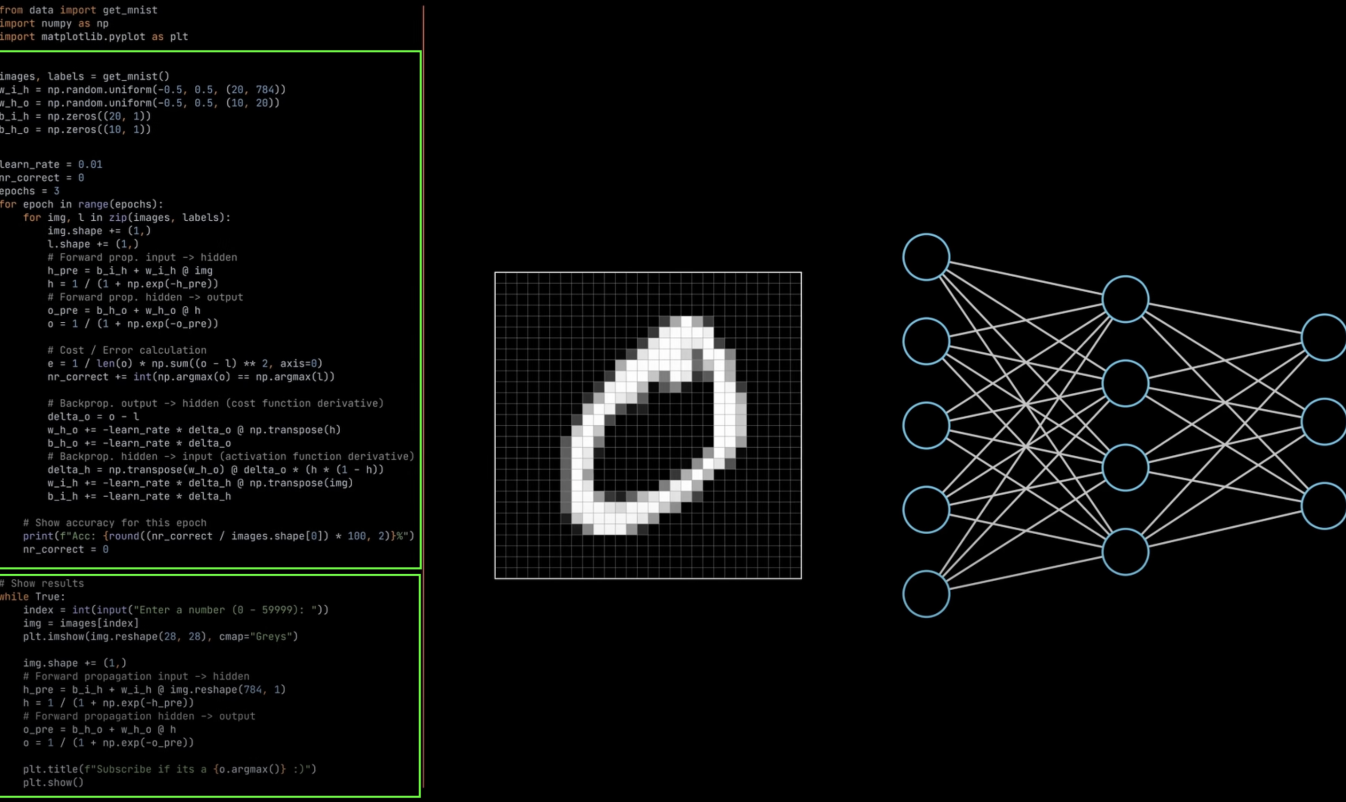


  - I did not (and cannnot) write this, but we can try it out :)
    - git clone https://github.com/Bot-Academy/NeuralNetworkFromScratch.git
    - cd NeuralNetworkFromScratch
    - python nn.py

## Computer Data.. It's all just numbers..
Computers deal with numbers.

**ALL data in a computer**  - code, text, photos, videos, spreadsheets, songs, websites - **EVERYTHING** is represented internally as a **sequence of numbers**.

When a computer is presented with a photo/audio recording/video/text, the computer will convert it to number(s) before accepting it and working with it.

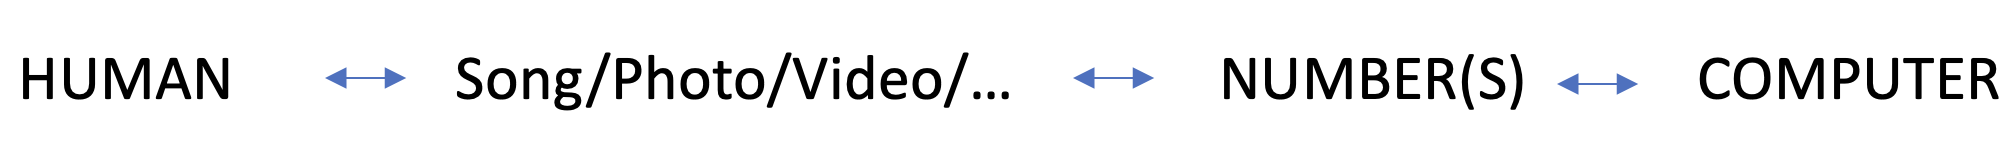<br>


## Also with AI, ML, Neural Networks, LLMs.. it's all just numbers

AI, ML, NEURAL NETWORKS and LLMs **all work by processing NUMBERS: taking NUMBERs as input and providing NUMBERs as output**
<br>
<br>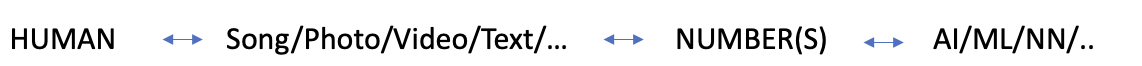

## MNIST Data Set - The "Hello World" data set of Neural Networks:
- consists of 60000 hand-drawn images<br>
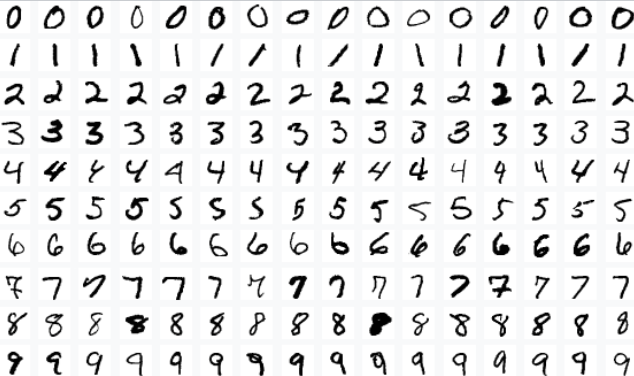

- each stored numerically, and each paired with a label between 0 and 9<br>
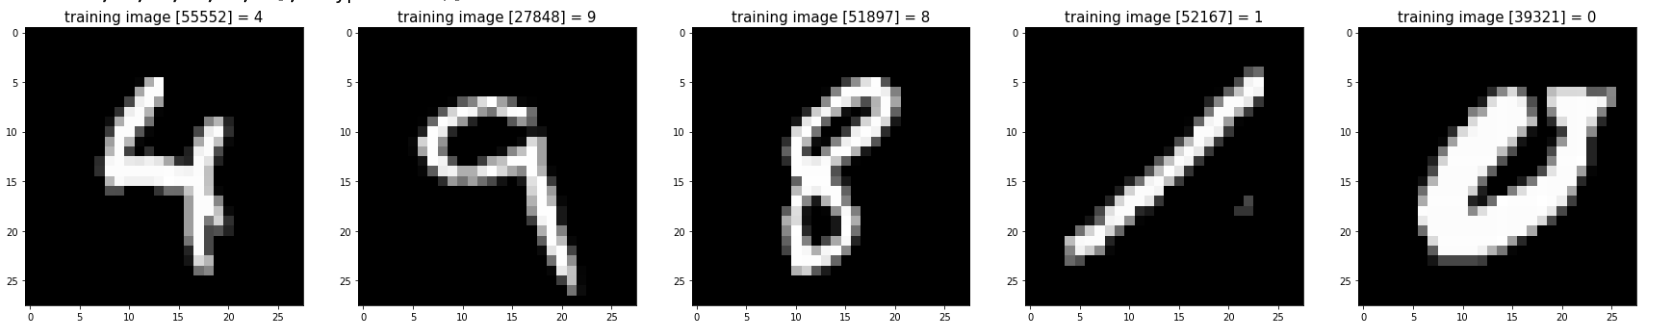
- each image is 28x28 pixels
- each pixel is encoded as a number (0=black, 255=white):<br>
- for example one of the digits, with the label "9" is: <br>

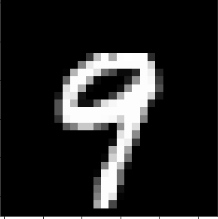

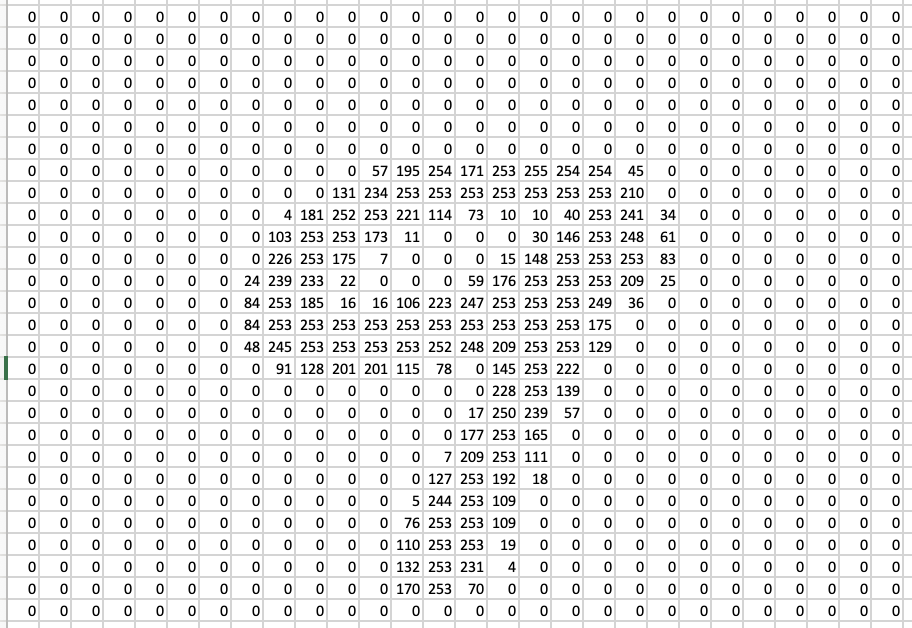

- If you read from left to right and top to bottom, you get 28*28 = 784 numbers
- **784 Numbers -> an image -> 784 Numbers**
- The classic Neural Network challenge of the last decades was to get Neural Networks to recognise the MNIST digits (More @ https://en.wikipedia.org/wiki/MNIST_database and https://www.kaggle.com/code/hojjatk/read-mnist-dataset )



# MATHEMATICAL FUNCTIONS

**1+1=2** is a statement about the Mathematical Function "ADDITION":

- if the numbers 1 and 1 are provided as **input** to the **Mathematical Function** "ADDITION", we get the **output** 2 
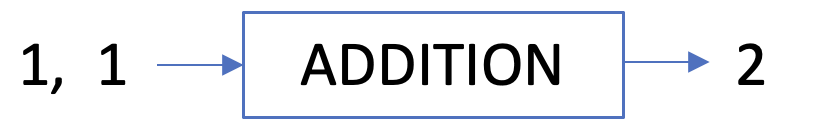

Some other examples of Mathematical Functions:

  - 1,2,3,4,5,6 → **ADDITION** → 21    (several inputs, 1 output)<br>
  - 1 → **ADD_ONE** → 2   (1 input, 1 output)<br>
  - 2,6,10 → **MULTIPLY** →  120     <br>
  - 2,6,10 → **AVERAGE** → 6 <br>
  - -12 ,  7,  11,  18  →  **SHOW_SMALLEST_AND_LARGEST** →  -12, 18  (Note we can have functions with **multiple outputs**)
  - -12, 7, 11, 17  →  **HOW_MANY_NEGATIVE_AND_HOW_MANY_POSITIVE**  →  1, 3

All of these Mathematical Functions:
- take zero or more **number(s)** as input,
- produce one or more **numbers(s)** as output
- are **deterministic** - meaning they always give the same answer for the same input.   1+1 is always equals to 2...<br> 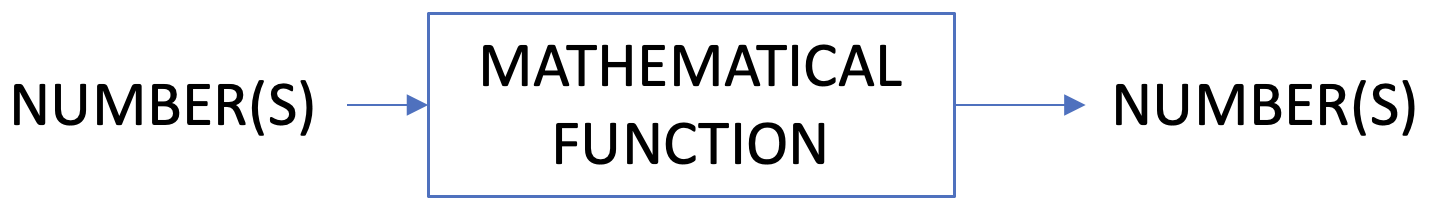


What about these:

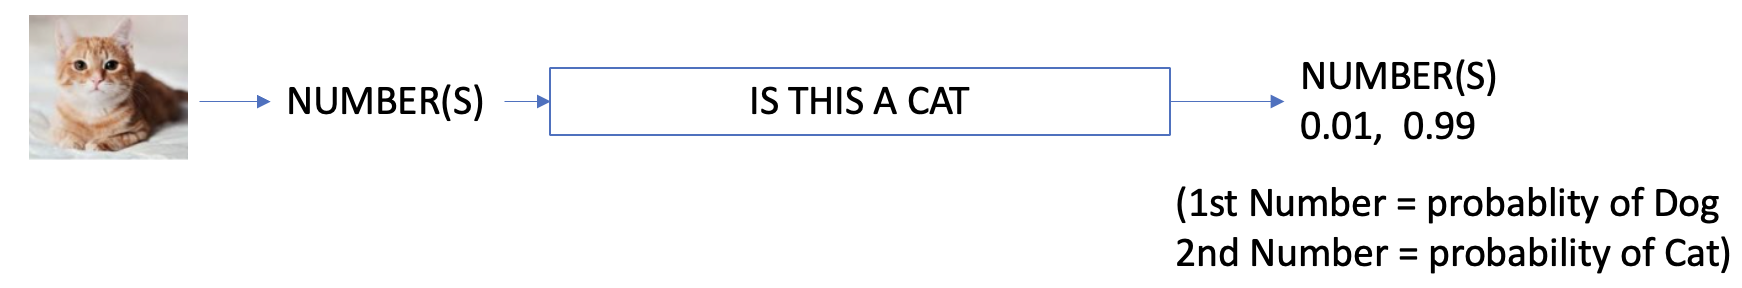

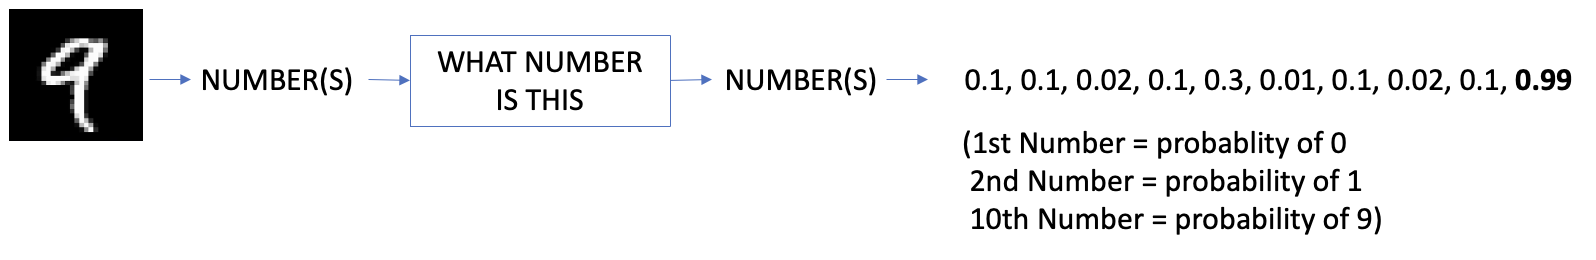

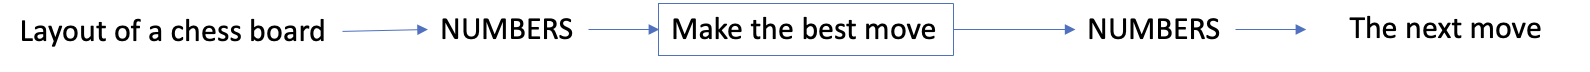


- These might be horrendously complex MATHEMATICAL FUNCTIONS, but **THEY ARE STILL MATHEMATICAL FUNCTIONS** :
    - they take numbers as input, 
    - they produce numbers as output
    - they are deterministic

### Some Mathematical Functions can be implemented as a normal computer program..

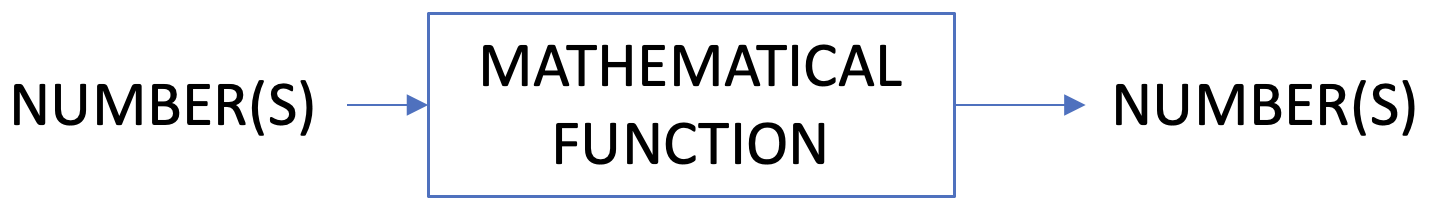

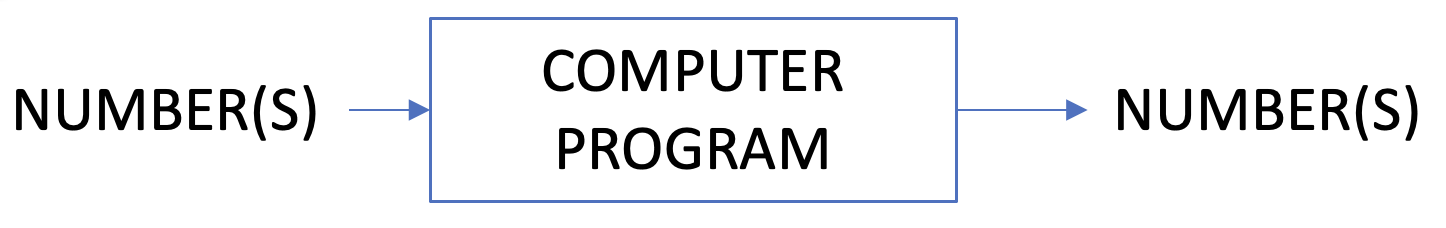

For example adding numbers together:


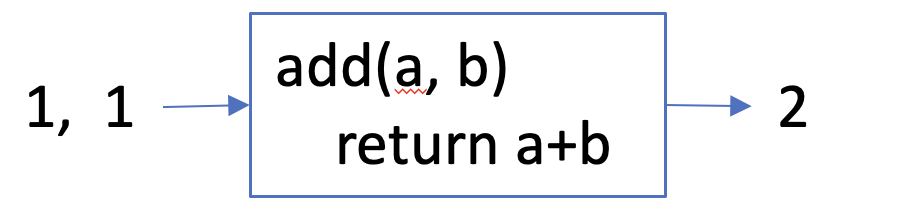

And also supremely complex problems like:

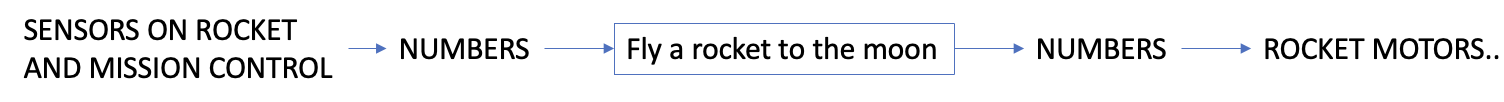

### But some Mathematical Functions are too complex to be implemented as a traditional computer program..

- is this a picture of a dog
- beat me at chess
- what does this image of a hand-written message say
  
This is where Neural Networks come in..

# NEURAL NETWORKS

Like a program, Neural Networks:

- also take numbers as input and produce numbers as output.
- are deterministic (they provide the same answer when given the same input)


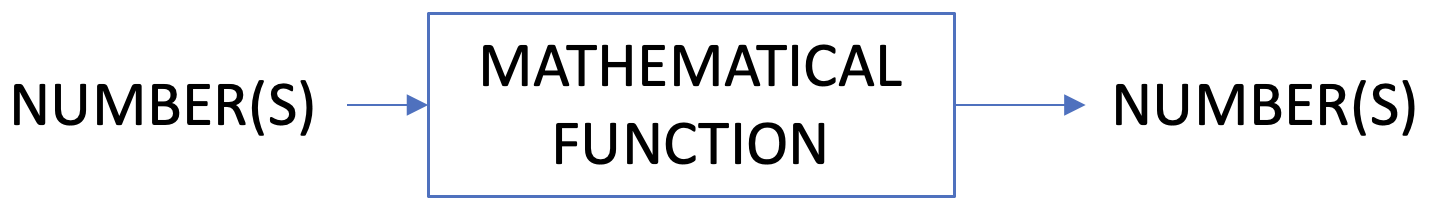

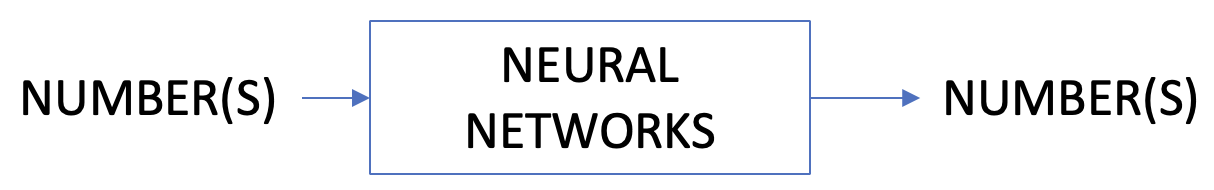


But unlike a program, the Neural Network:

- gives **APPROXIMATE** answers, typically as "probabilities/likelihoods"
- rather than being "programmed", it is "trained" using thousands/millions of input-output pairs
- Neural networks let us **approximate the behaviour of massively complex mathematical functions**
- Think of a Neural Network as a **Universal Mathematical Function Approximator**  (More @ https://www.youtube.com/watch?v=xg4bIeJTVF0)

## Our task for the Neural Network, from 30000 feet: 

How to create a Neural Network that recognises MNIST characters very well..

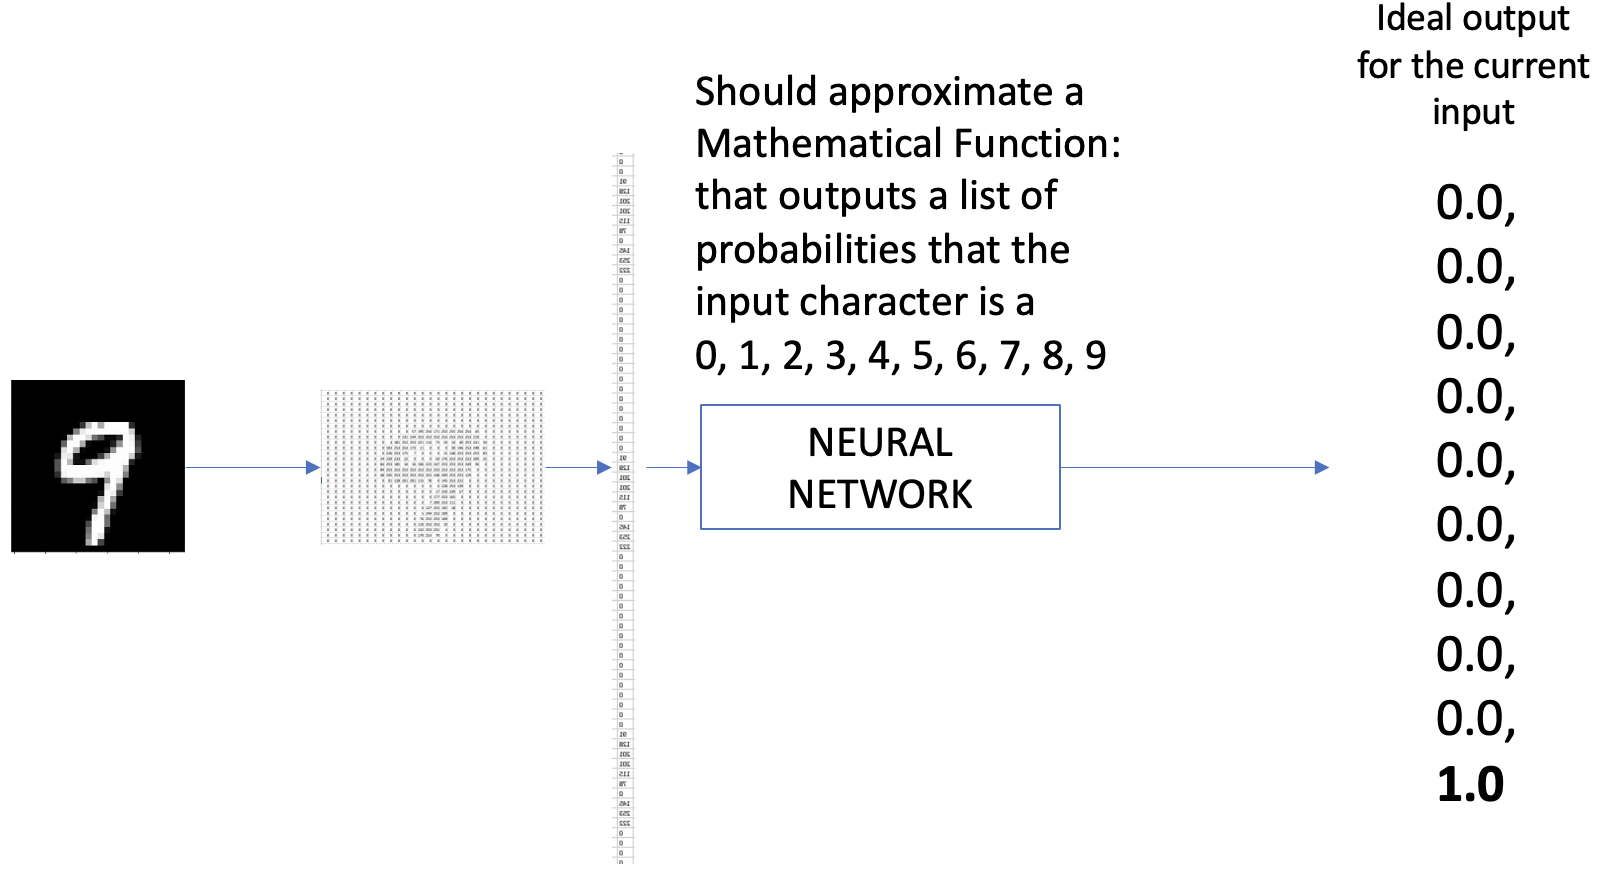
 

## Our task from 20000 feet: 
Neural Networks are made up of **Perceptrons** - often hundreds, sometime thousands or millions of them..

### A Perceptron:

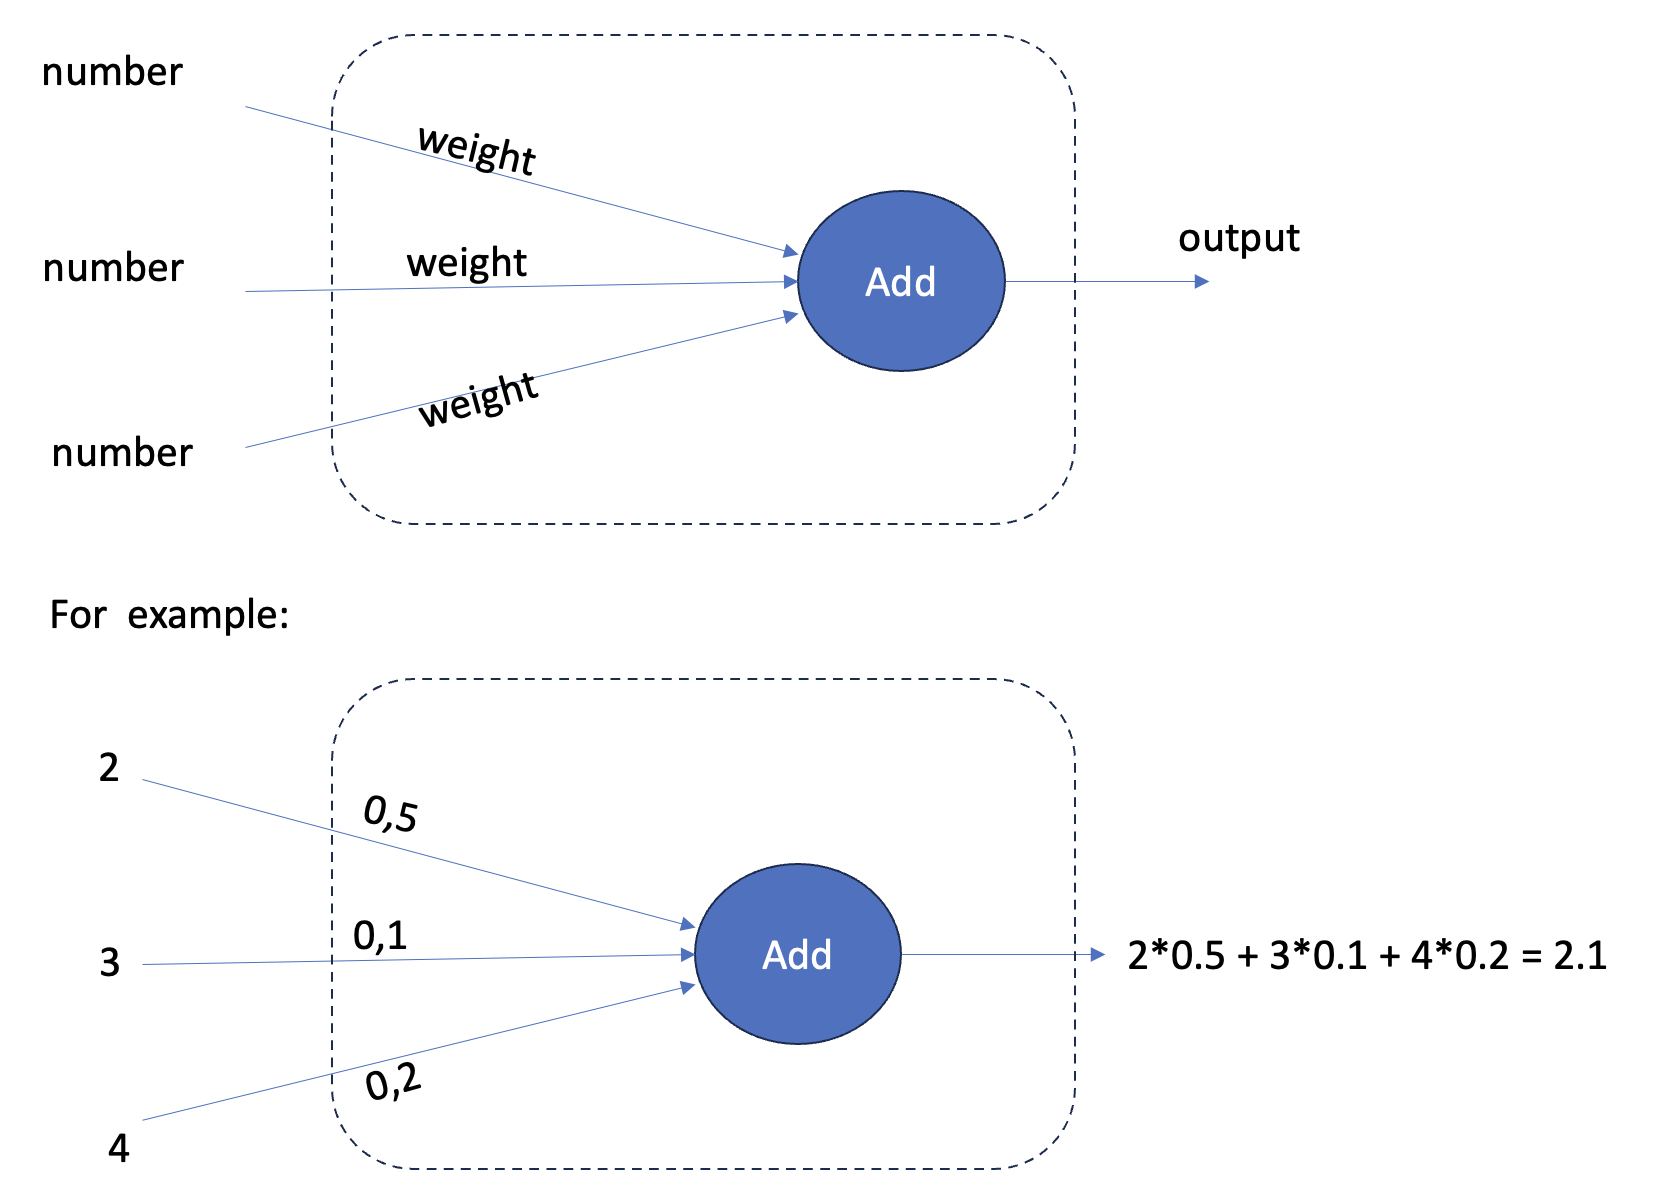

A neural network will have:
  - an input layer, which is simply **the input** numbers
  - 0 or more "hidden" layers, **containing perceptrons**
  - an output layer containing **the answer**
  - **adjustable weights** connecting everything

Here is an untrained neural network for recognising MNIST characters. 

The blue parts are our perceptrons<br>

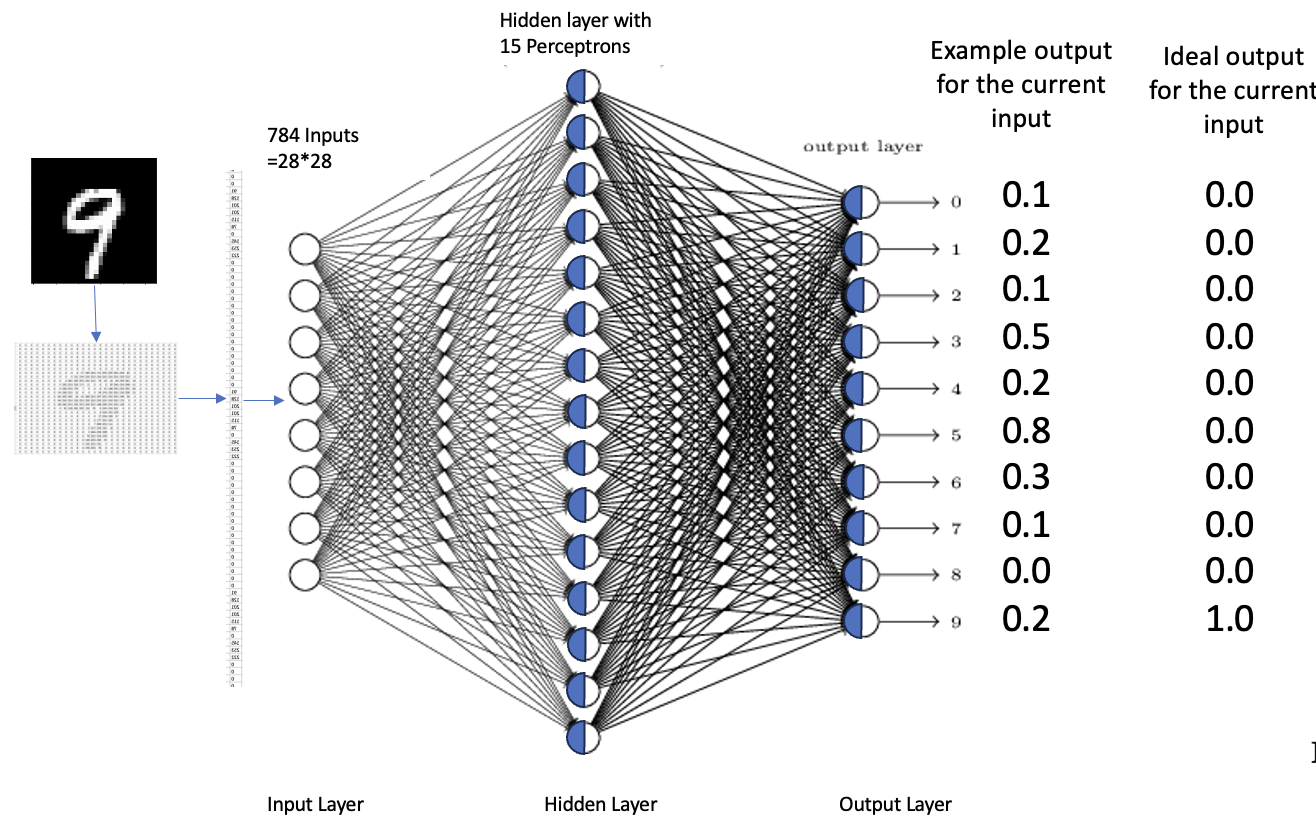


(For comparison, chatG.P.T. has ~96 layers of size ~12288 each)

The challenge is to **adjust the weigths** to get the behaviour we want..


### Why Perceptrons? What makes them so useful?

Perceptrons can represent simple mathematical functions exactly:

Consider the function: **y = mx+c**

This can be replicated by the Perceptron:

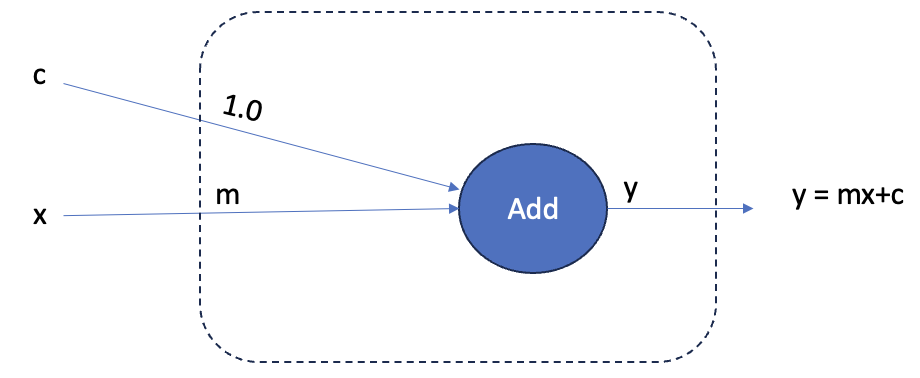

In [ ]:
def f(x): return 4*x+2
plot_function(f, 'x', '4x+2')

But that is not very exciting or useful..

Let's make a small change to this perceptron:

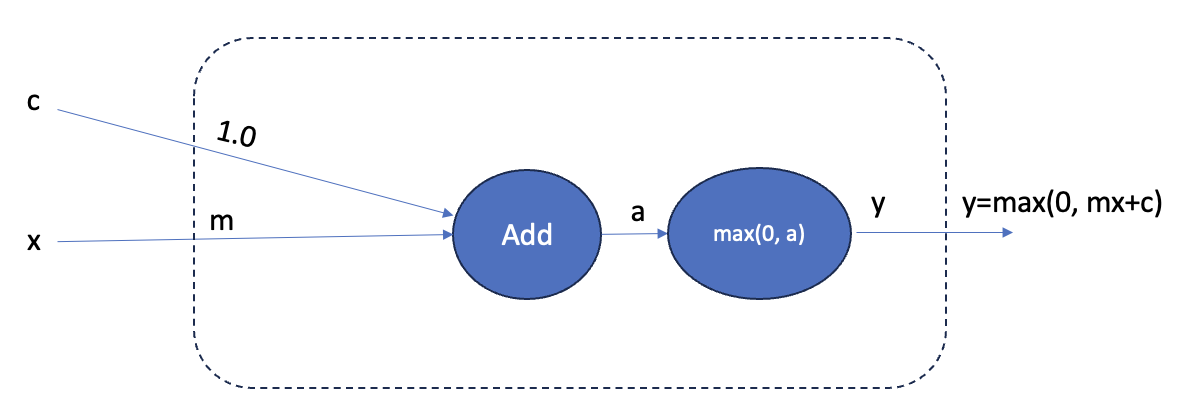

We call the extra block the **"activation function"** (because it determines how much the perceptron is "activated")

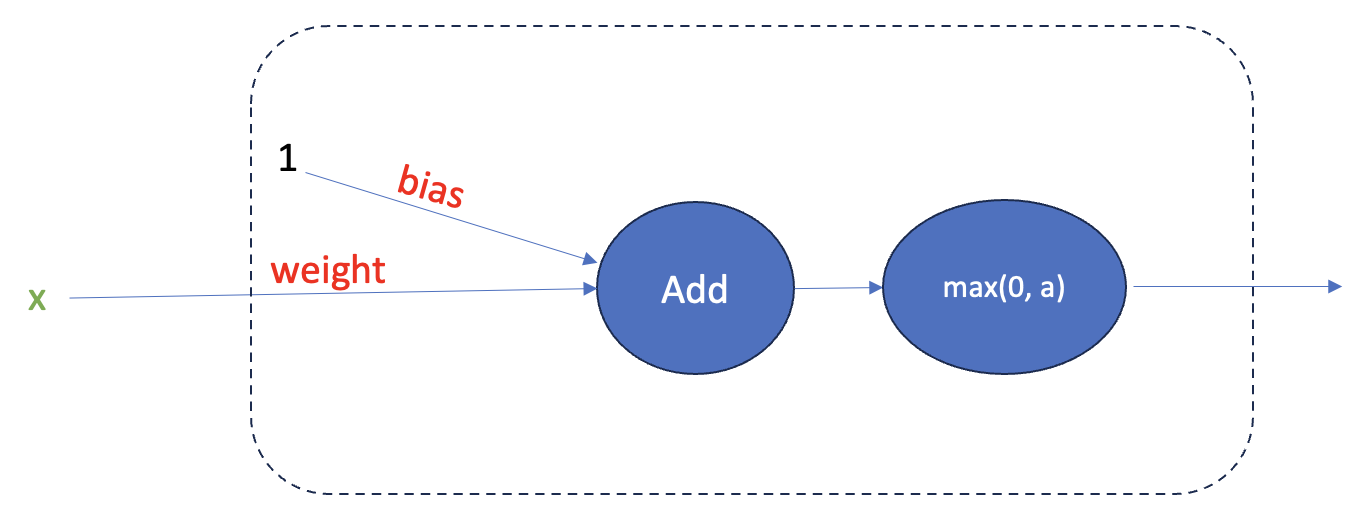


In [ ]:
def rectified_linear(weight,bias,x):
  y=weight*x+bias
  return torch.clip(y, 0.)

@interact(weight=1.5, bias=1.5)
def plot_relu(weight, bias):
    plot_function( partial(rectified_linear, weight, bias))

This is much more useful, because **you can theoretically combine a lot of these (perhaps millions) to closely approximate any function**..

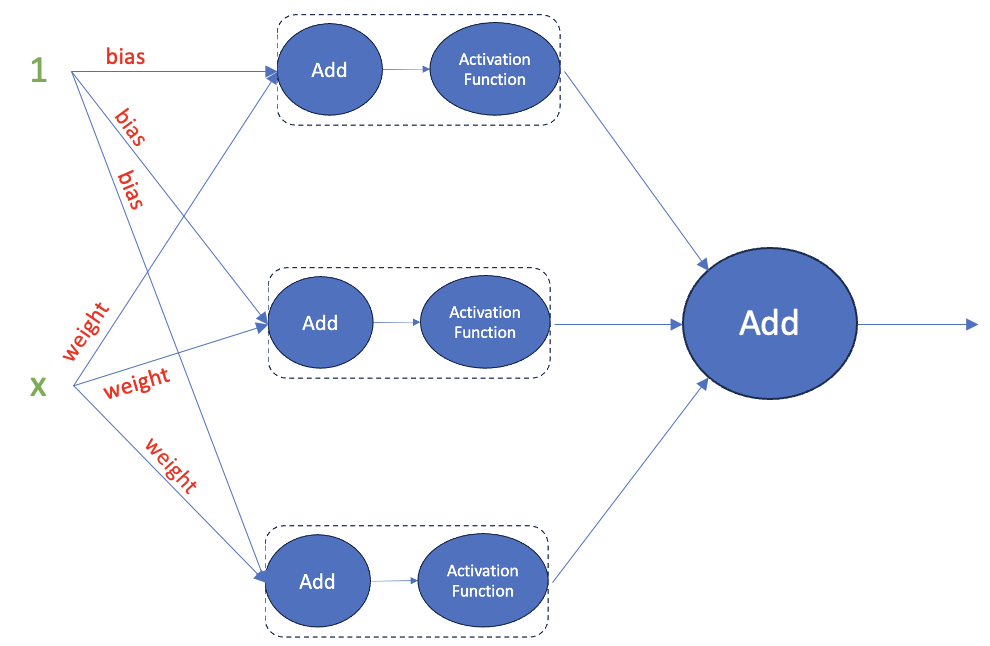


### Consider (just) two perceptrons:

In [ ]:
def double_relu(m1, b1, m2, b2,x):
   return rectified_linear(m1,b1,x)+  rectified_linear(m2,b2,x)

@interact(m1=-1.5, b1=-1.5, m2=1.5, b2=1.5)
def plot_double_relu(m1, b1, m2, b2):
    plot_function( partial(double_relu, m1, b1,m2,b2))

With enough perceptrons and tweaking of the weights, you could replicate any mathematical function:

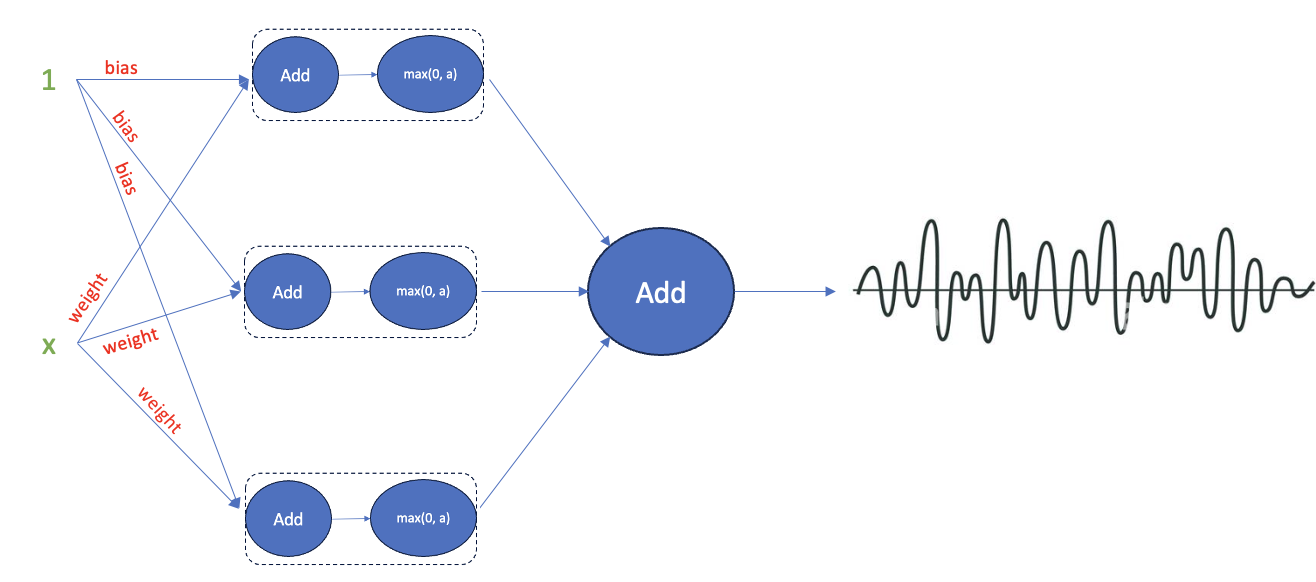

### A better activation function
It turns out that max(a,0) is good but a different **activation function** is even more useful as:

- it still allows us to create any function by adding more and more perceptrons
- it again disallow negative values, but it also squashes the output to between 0 and 1
- it prevents explosions in values across the Neural Network,
- it is called the Sigmoid Function  (more @ https://towardsdatascience.com/derivative-of-the-sigmoid-function-536880cf918e)

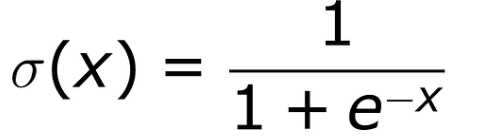


In [ ]:
def sigmoid(x): return 1/(1+torch.exp(-x))
plot_function(torch.sigmoid, title='Activation Function "Sig"', min=-4, max=4)

This gives us a full Perceptron:

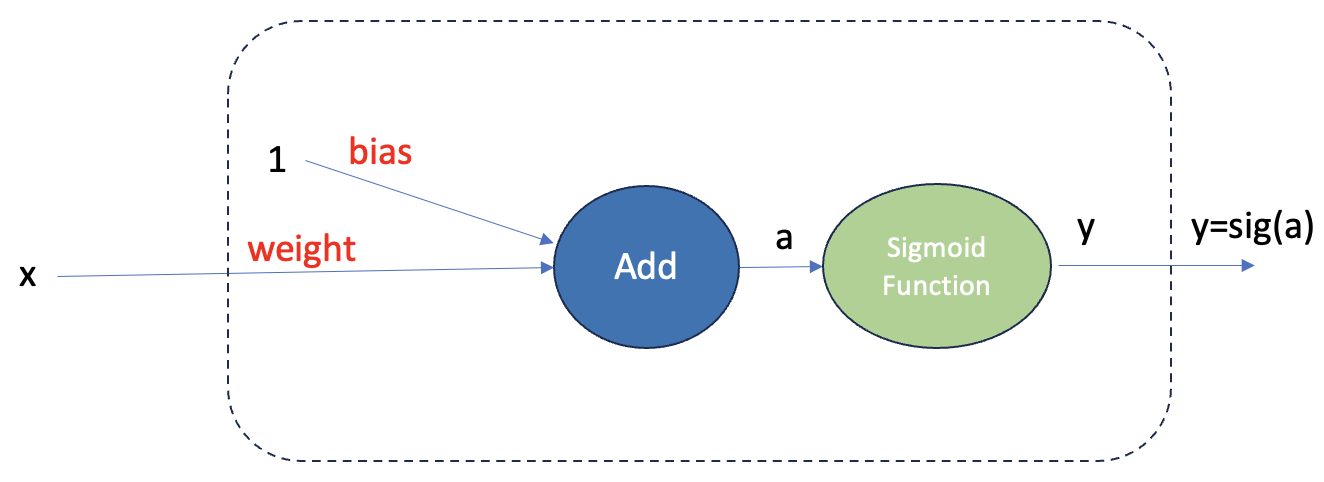

Our network has not just 1 layer (that can simulate a complex x-y function, but has an additional "hidden" layer. 

This allows the neural network to simulate multi-dimensional mathematical functions - ones that are good enough to recognise hand-written digits.. 

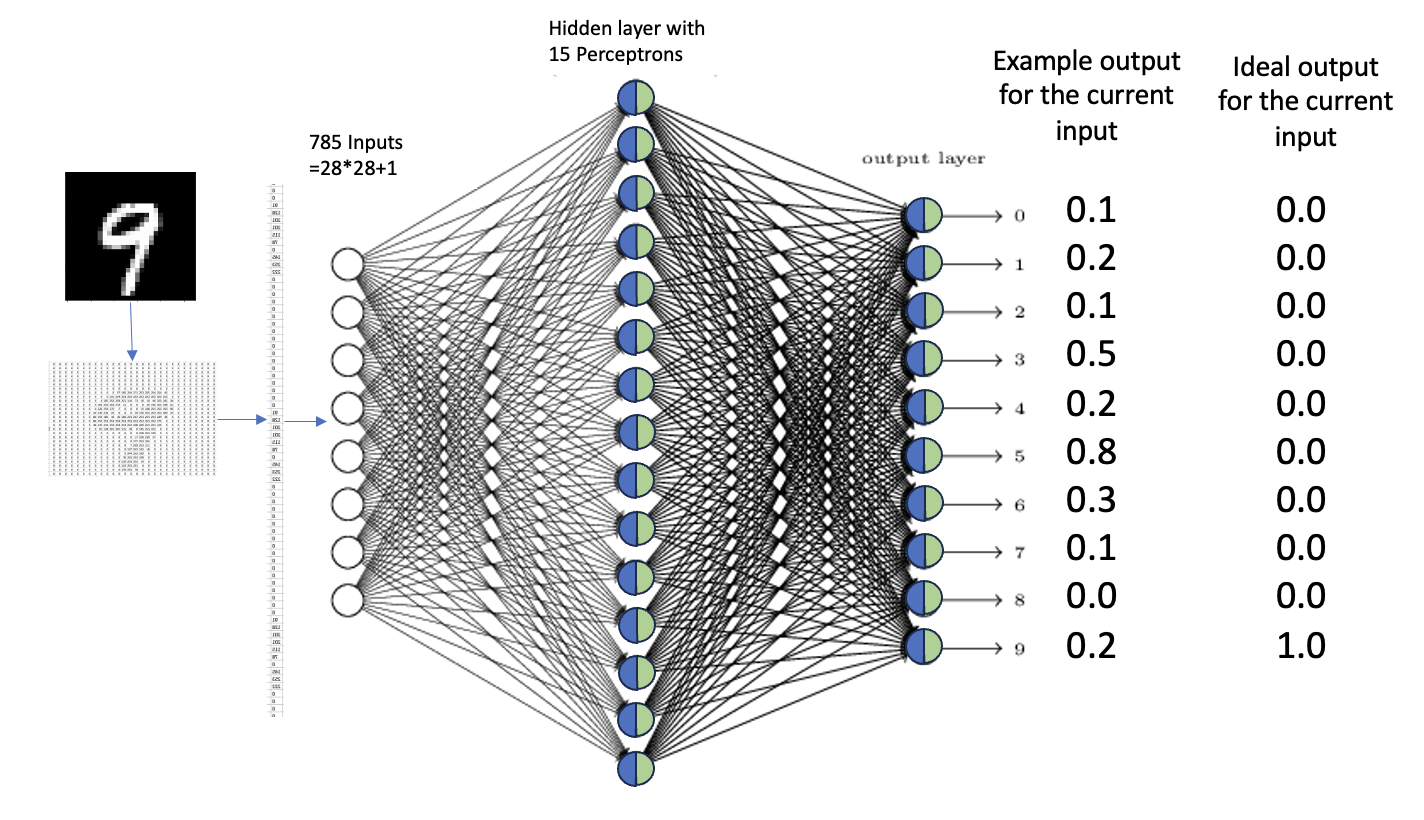


Our challenge is to find the weights in the network such that the Neural Network best approximates our hypothetical perfect mathematical function.

!! If we had endless time, we could simply adjust the weights randomly until we found an excellent fit, but we want an efficient way to do this...


## Our task from 5000 feet


### Training a Neural Network

- Let's call one snapshot of the NN at work, **an iteration**.
- In the **iteration** below we have presented an image of "9" and we can see the output

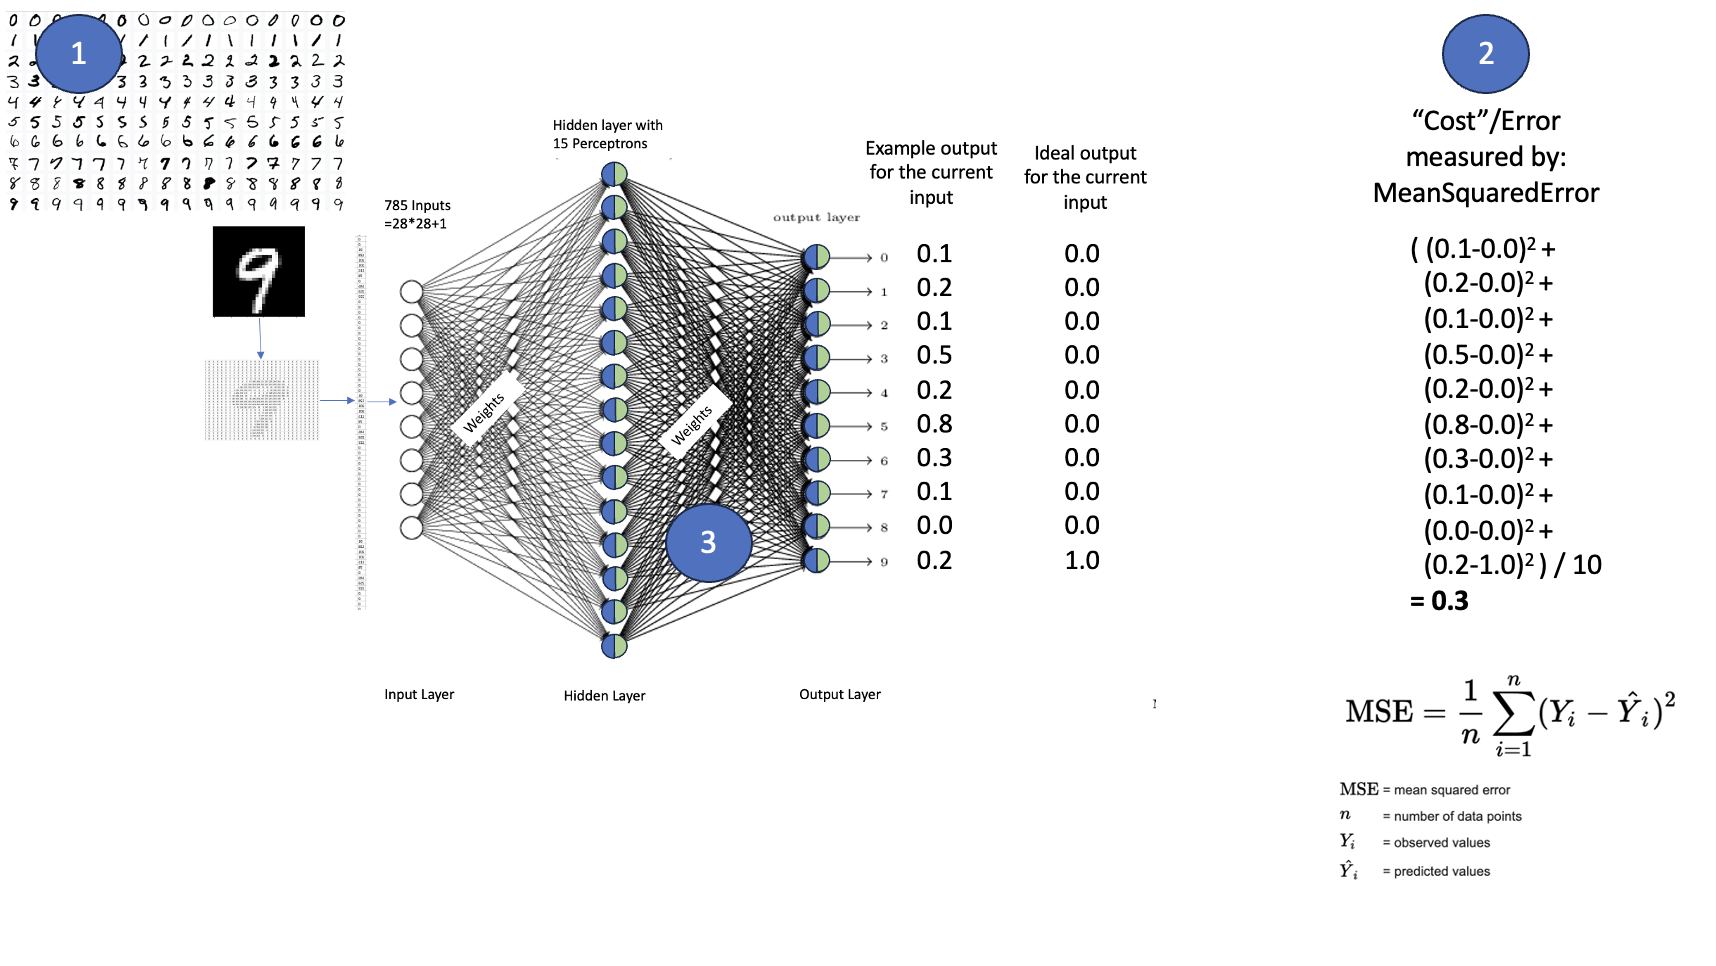

#### The "Cost" of our Network is measured with Mean Squared Error

The Cost (Mean Squared Error) is a useful way to **measure how bad our results are**:  (more @ https://en.wikipedia.org/wiki/Mean_squared_error)

- 0 = perfect
- The larger the Cost, the worse the results


## Finding good weights with The Chain Rule .. THE SECRET SAUCE...

- In this simple example of a NN,  we have **over 110000 weights** (784*15*10)
- The ideal (unknown) mathematical function, mapping all MNIST inputs to their correct ideal outputs, is **VERY COMPLICATED** and we cannot hope to directly calculate the ideal weights in an efficient manner.
- Instead, a technique called the "CHAIN RULE" allows us to **iteratively improve the weights at each iteration, to reduce the current cost**

### Chain Rule

- For any iteration:
  - Calculate the gradient of every weight for that interation, by appling the chain rule
  - Take each weight "downhill" a little bit 
  - Repeat for the next iteration

See this cool explanation:  https://www.youtube.com/watch?v=Ilg3gGewQ5U


#### Gradients ..

If variables x and y are related by a function **f** such that **y = f(x)** then the derivate of that function **f'** a.k.a. **the derivate of f w.r.t. x** also called **dy/dx** gives us the  **slope** at any point **x** 


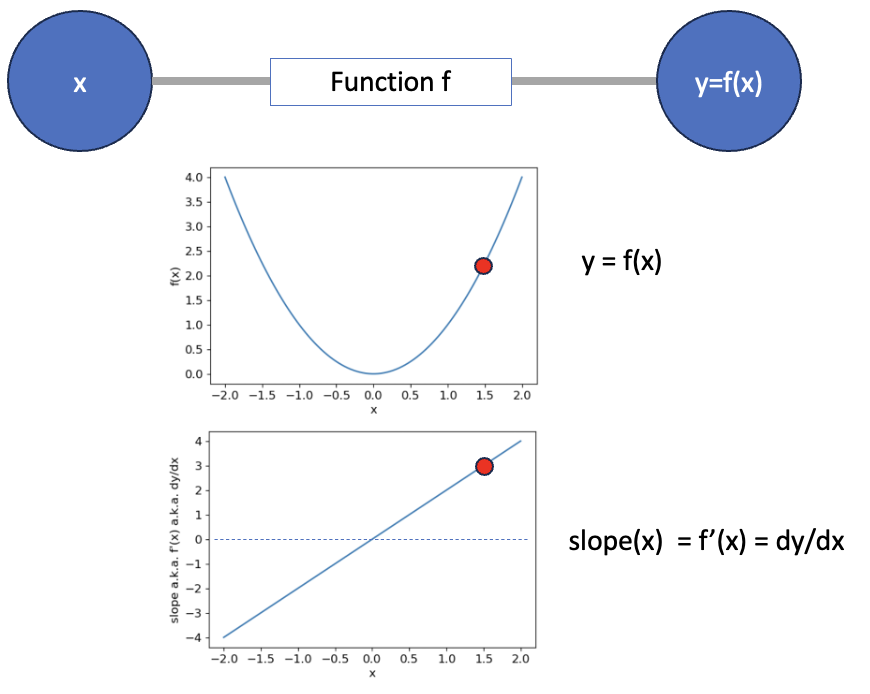

We know each **weight is related to the overall cost** by some (unknown) function: c = f(w) 

Though we don't know that function, we **CAN** determine the current slope of that function at w.

We want to reduce the cost so:

  - find the slope at w
  - if the slope at w is positive (going up to the right), then choose a slightly smaller w
  - if the slope at w is negative (going up to the left), then choose a slightly larger w

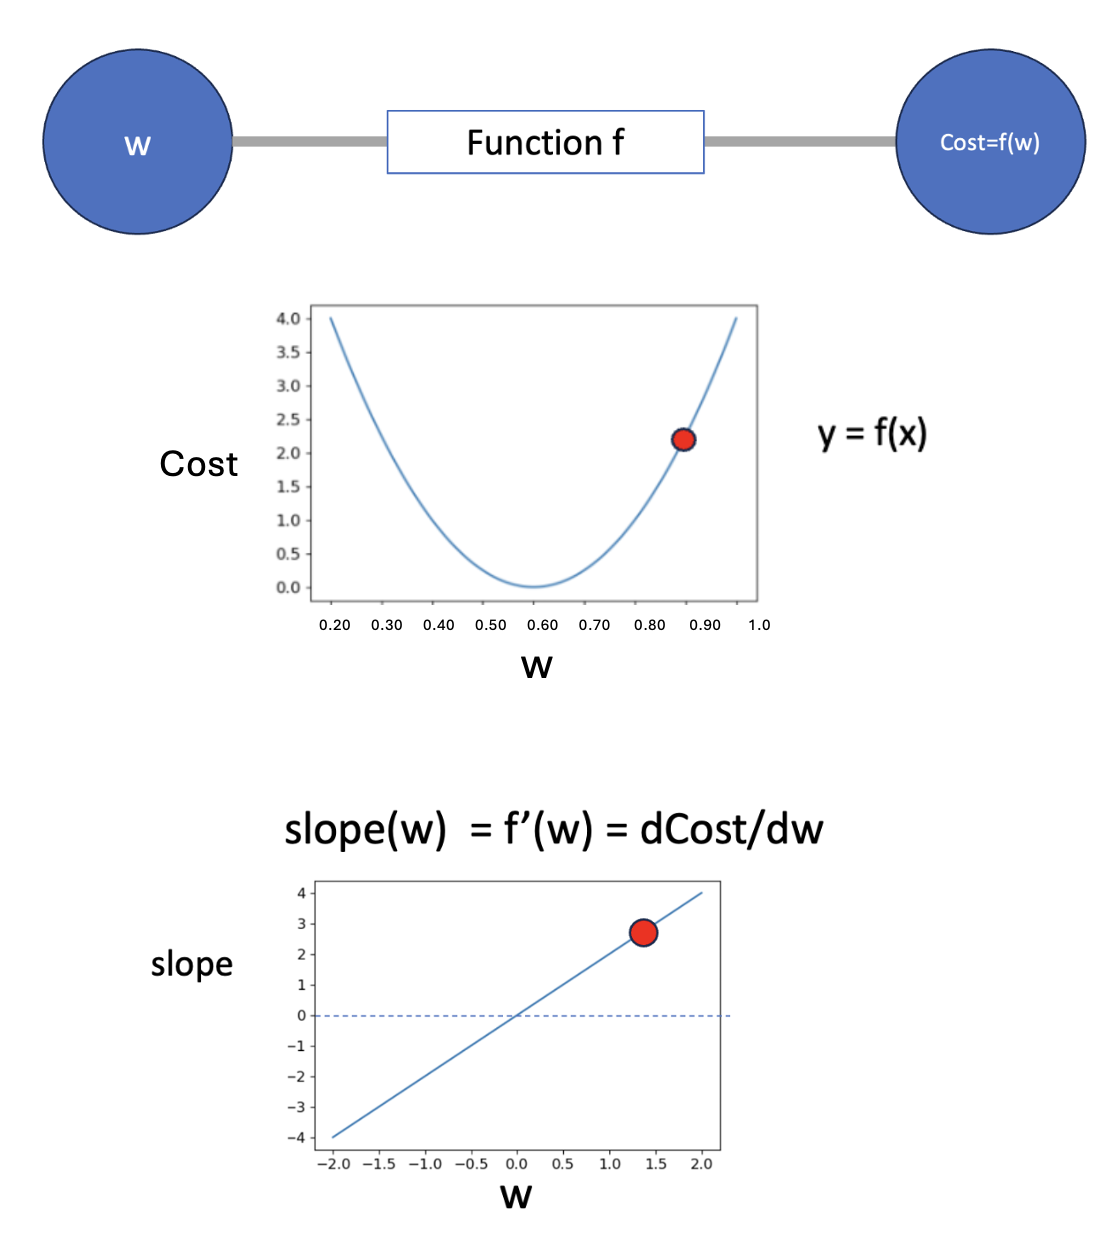


This is called "**Gradient Descent**"
-  it allows us to iteratively locate the best weight for producing the lowest cost.

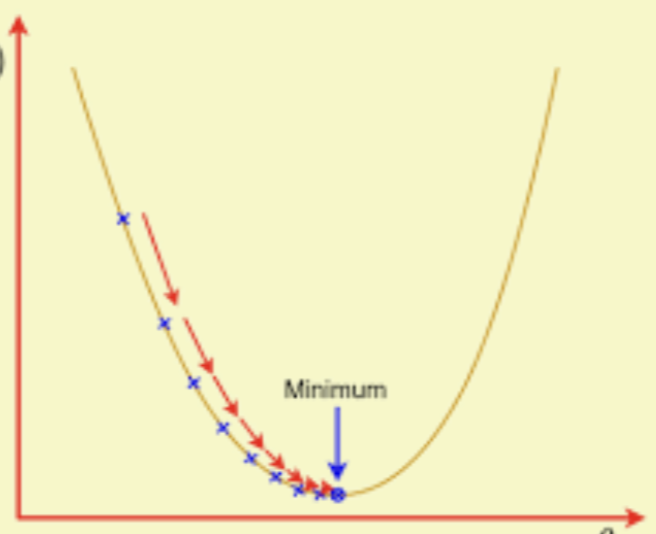


#### The Chain Rule

But all functions (relationships) in our neural network are clearly defined..

We consider just a small section of the NN, but big enough to demonstrate the whole process.  

- Cost = MSE(o1)
- o1 = sig(z3)
- z3 = h1 * w5 + h2 * w6
- h1 = sig(z1)
- h2 = sig(z2)
- z1 = x1 * w1 + x2 * w3
- z2 = x1 * w2 + x2 * w4

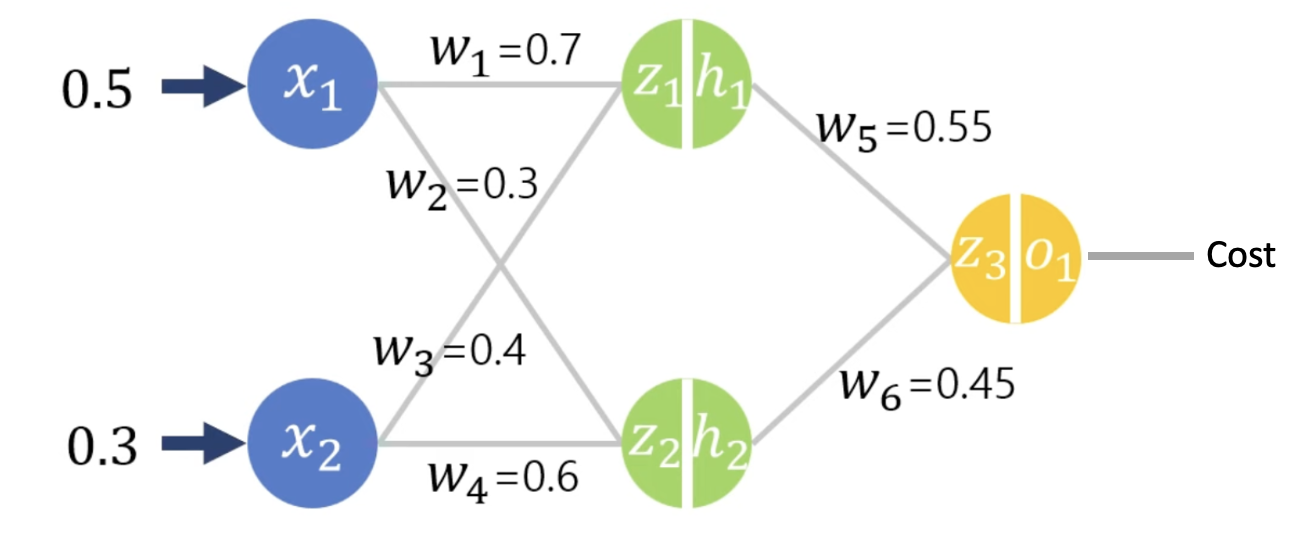

For any iteration, the chain rule **gives us the slope of each weight with relation to the cost**  by chaining together the slopes of the functions between it and the output**

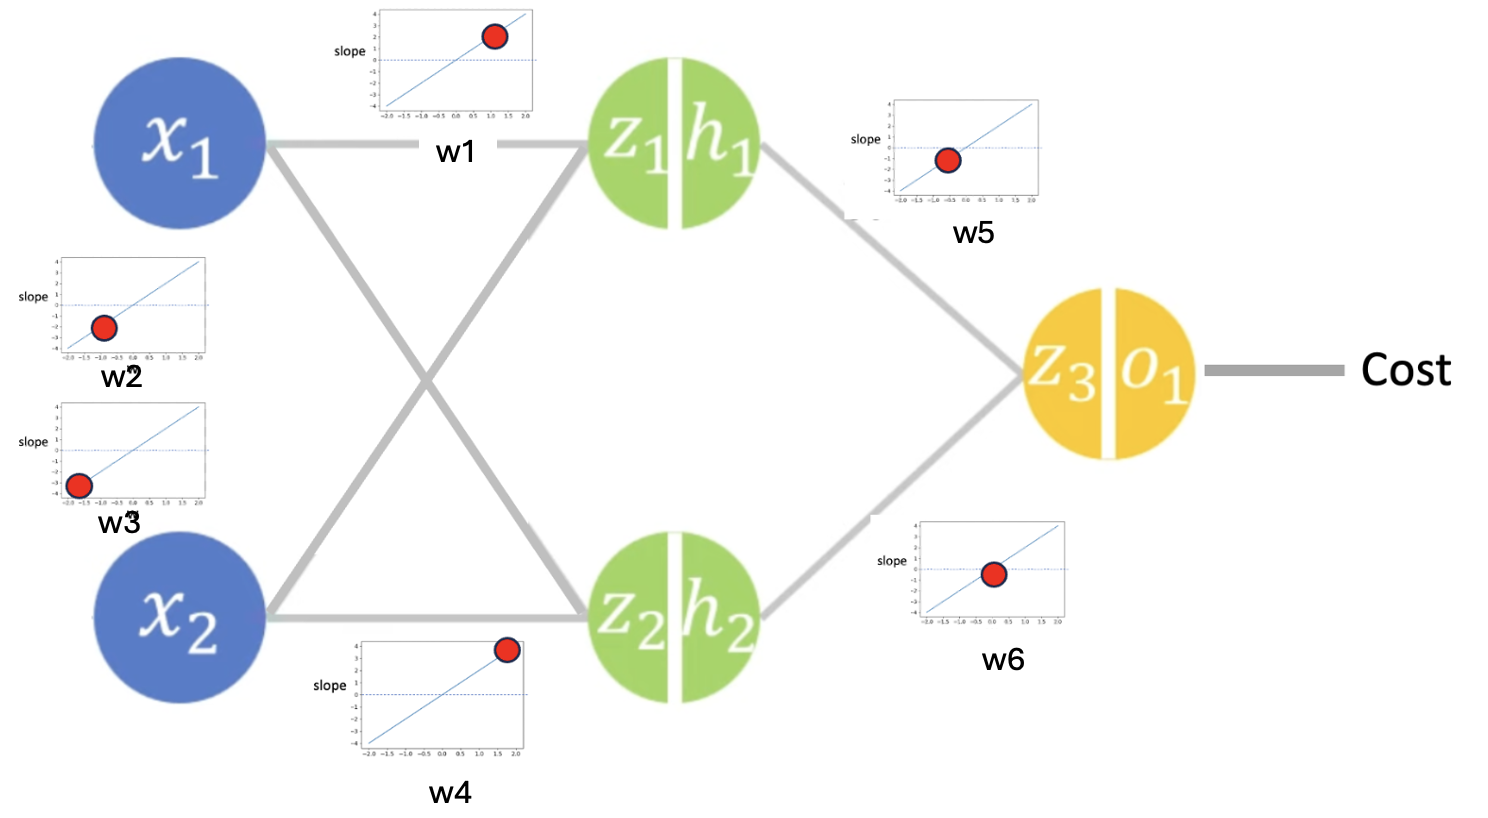

For example:<br>
**dCost/dw5 = dCost/dO1 * dO1/dZ3 * dZ3/dW5**  gives us the slope of dw5, and<br>
**dCost/dw1 = dCost/dO1 * dO1/dZ3 * dZ3/dh1 * dh1/dZ1 * dZ1/dW1**  gives us the slope of dw1.<br>

(more @ https://en.wikipedia.org/wiki/Chain_rule )

# HOW A NEURAL NETWORK LEARNS... Ground level..

We now have all we need to train a neural network...

Again we consider a small section of the NN, but big enough to demonstrate the whole process.  

(For a good video walk-through of the next steps see https://www.youtube.com/watch?v=QflXxNfMCKo )

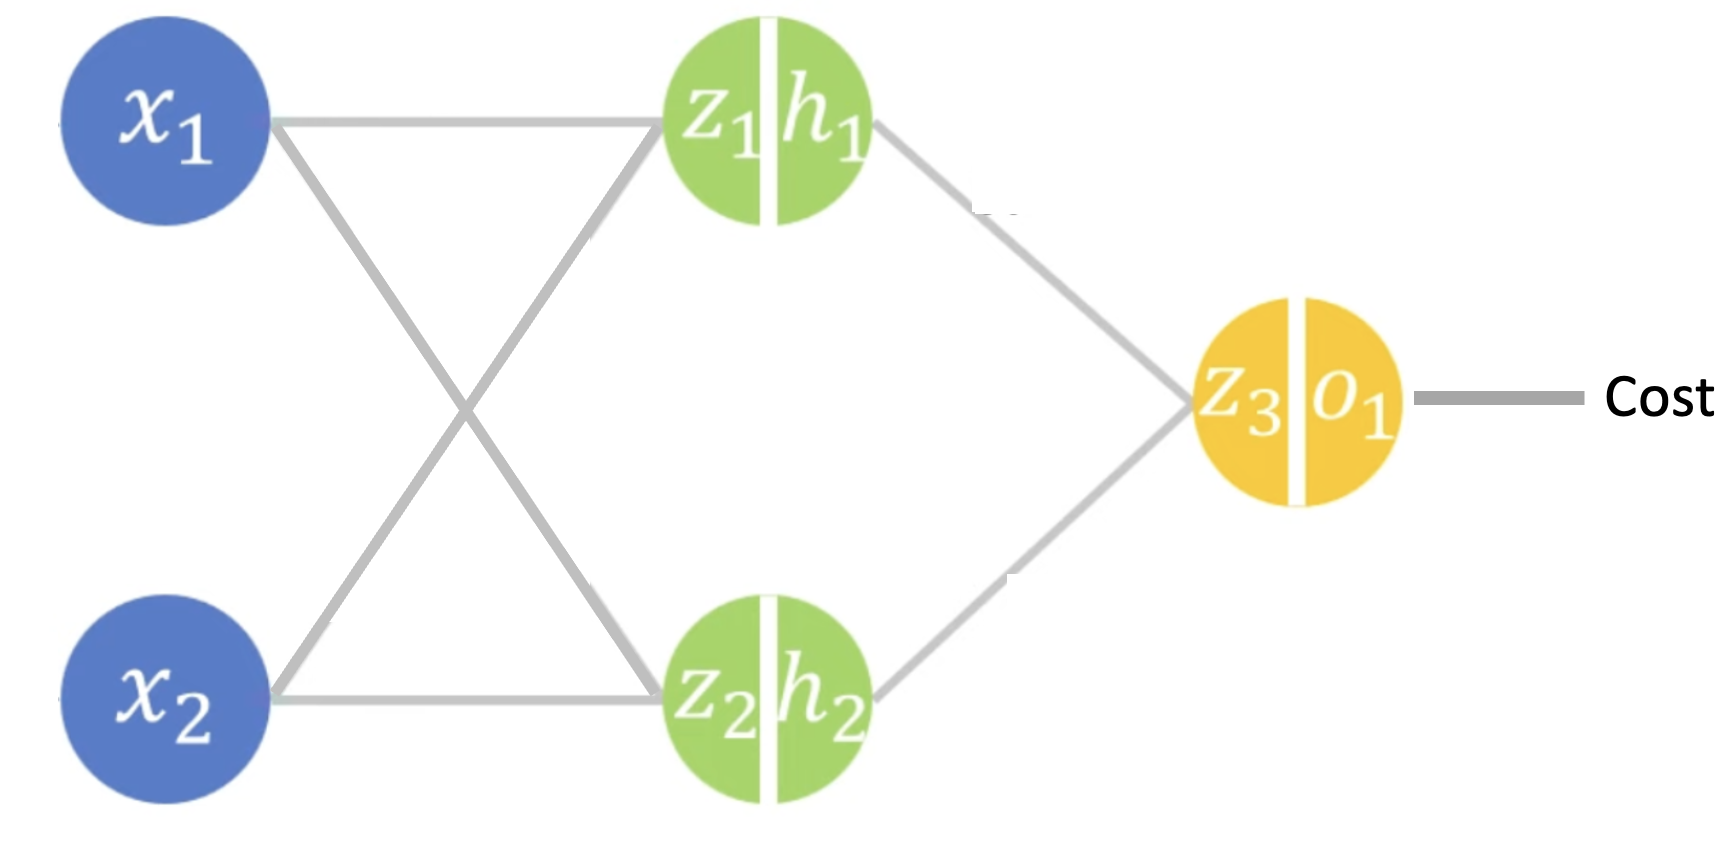



1) Initialize the network by selecting random values between 0 and 1 for all the weights
2) "Feed Forwards":<br> Plug in the input values of an image, to **set the values in each perceptron** (and to measure the **cost**) <br>

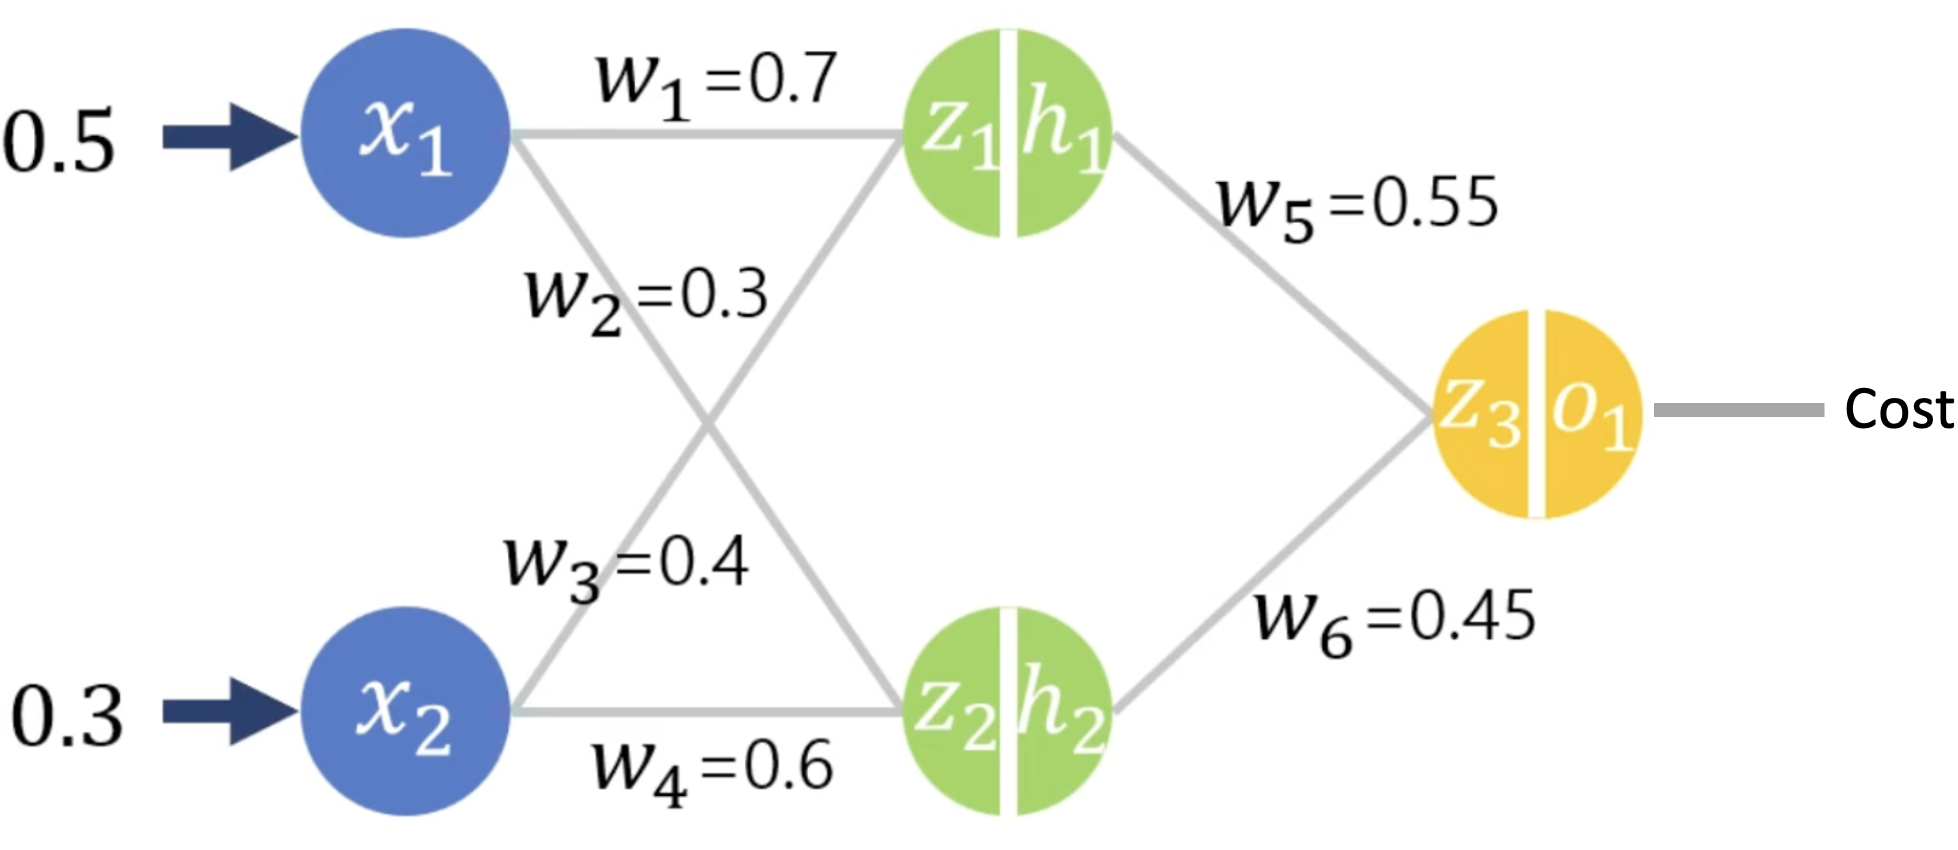


3) "Back propogation": <br>Calculate the slopes of all weights with respect to the cost, by using the chain rule..<br>

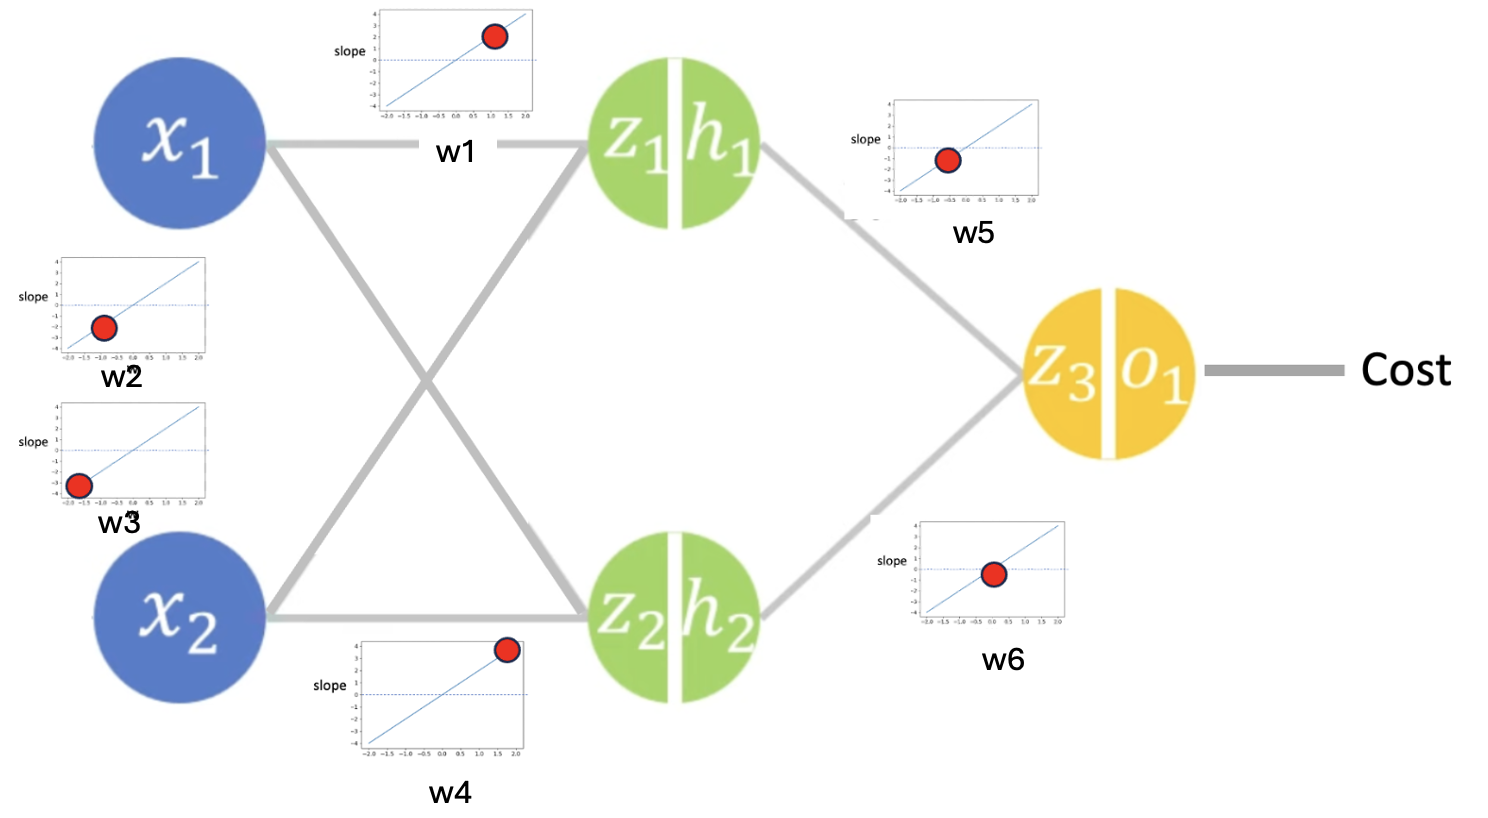
  - if the slope at w is positive, choose a slightly smaller w<br>
  - if the slope at w is negative, choose a slightly larger w<br>
4) Repeat from step 2 for all images in our data set, to make **one Epoch**

Perform a few Epochs and we are done!


# Python Example

The python example does this in about 20 lines of Python

Rather than altering one weight at a time, matrices are used so many weights can be changed in one step.

See the python walk through for an example : 

  - code: https://github.com/Bot-Academy/NeuralNetworkFromScratch/blob/master/nn.py
  - video explanation: https://www.youtube.com/watch?v=9RN2Wr8xvro
  - there are no special libraries (hiding complexity) here<br>

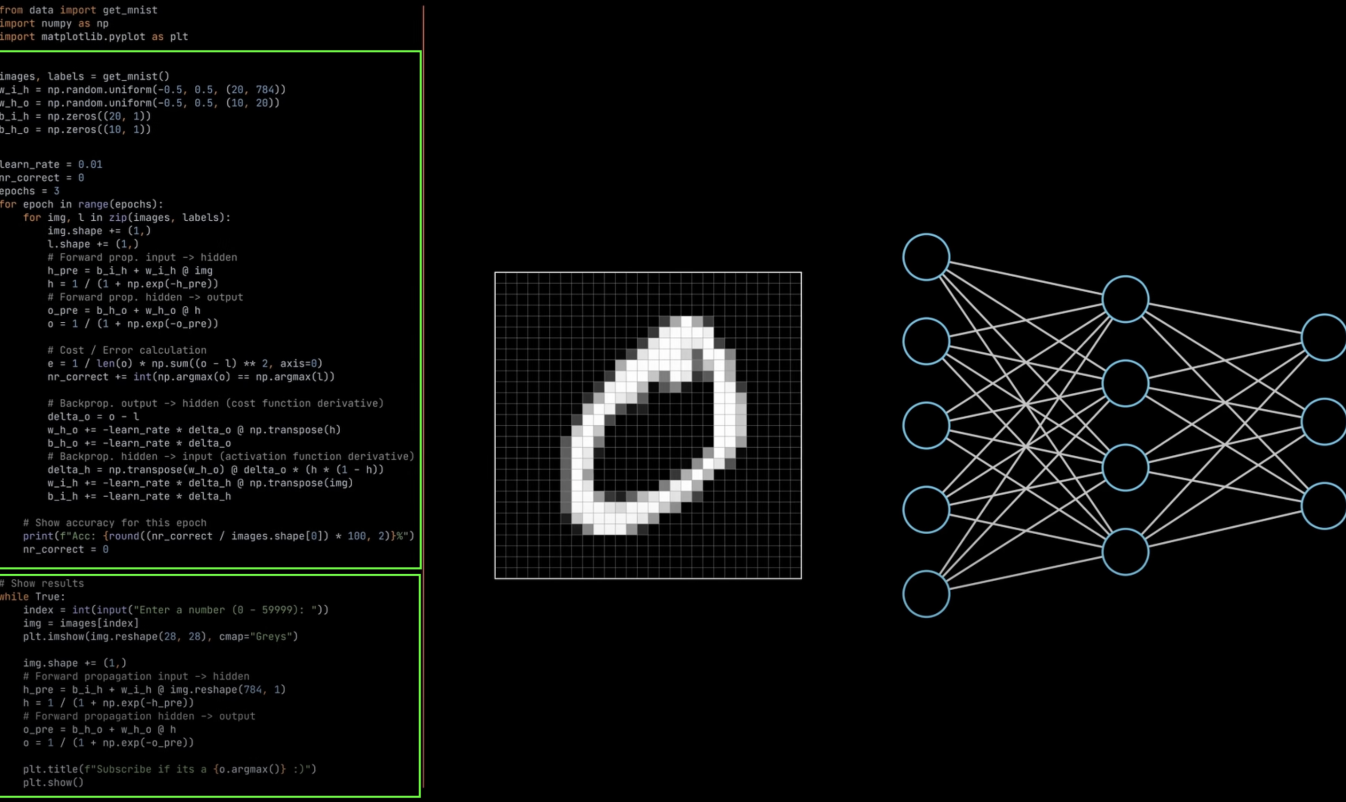